In [1]:
import numpy as np
import matplotlib.pyplot as plt
import OpinionModel
import networkx as nx
rng = np.random.default_rng()

def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500)
    plt.show()

Plot graph

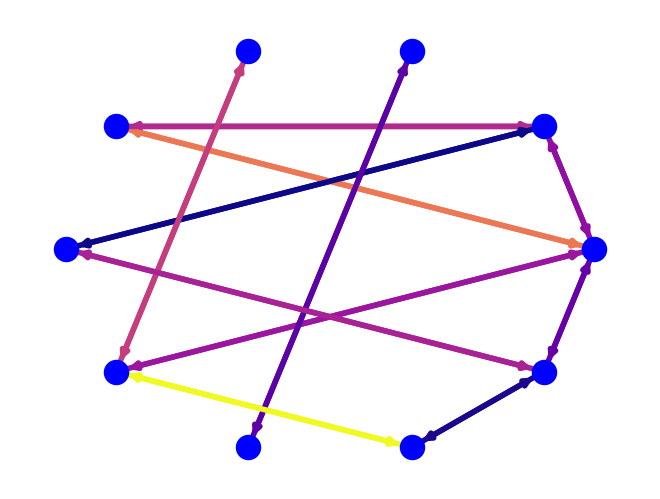

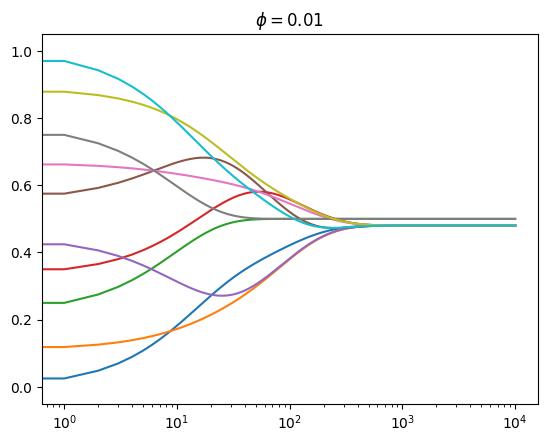

In [58]:
model = OpinionModel.Deterministic()
model.phi = lambda h : 0.05 + 0 * h


diGraph = rng.exponential(0.3, size=(10,10)) * (rng.integers(10, size=(10,10))<1)
diGraph = 0.5 * (np.transpose(diGraph) + diGraph)
no_diagonal = diGraph * (np.diag(np.full(10, -1)) + np.ones((10, 10)))
G = nx.from_numpy_array(np.matrix(no_diagonal), create_using=nx.DiGraph)
edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())

nx.draw_circular(G, node_color='b', edgelist=edges, edge_color=weights, width=4, edge_cmap=plt.cm.plasma)
plt.show()
steps, nodes = model.generate(steps=10000, network=diGraph)
for i in range(len(nodes[:,0])):
    plt.plot(steps, nodes[i,:])
plt.title("$\phi=0.01$")
plt.xscale('log')